# Analysis of Geolocational Data

Data Collection 

In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv('food_coded.csv', usecols= ['cook','eating_out','employment','ethnic_food','exercise','fruit_day','income','on_off_campus','pay_meal_out','sports','veggies_day']) 

In [3]:
 df

,cook,eating_out,employment,ethnic_food,exercise,fruit_day,income,on_off_campus,pay_meal_out,sports,veggies_day
0,2.0,3,3.0,1,1.0,5,5.0,1.0,2,1.0,5
1,3.0,2,2.0,4,1.0,4,4.0,1.0,4,1.0,4
2,1.0,2,3.0,5,2.0,5,6.0,2.0,3,2.0,5
3,2.0,2,3.0,5,3.0,4,6.0,1.0,2,2.0,3
4,1.0,2,2.0,4,1.0,4,6.0,1.0,4,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...
120,3.0,2,1.0,4,2.0,5,4.0,3.0,4,1.0,5
121,3.0,4,3.0,3,2.0,4,2.0,1.0,4,NaN,5
122,3.0,3,3.0,5,2.0,4,2.0,1.0,4,2.0,4
123,3.0,5,2.0,2,1.0,5,4.0,1.0,3,2.0,3


# Data Exploration and Visualization

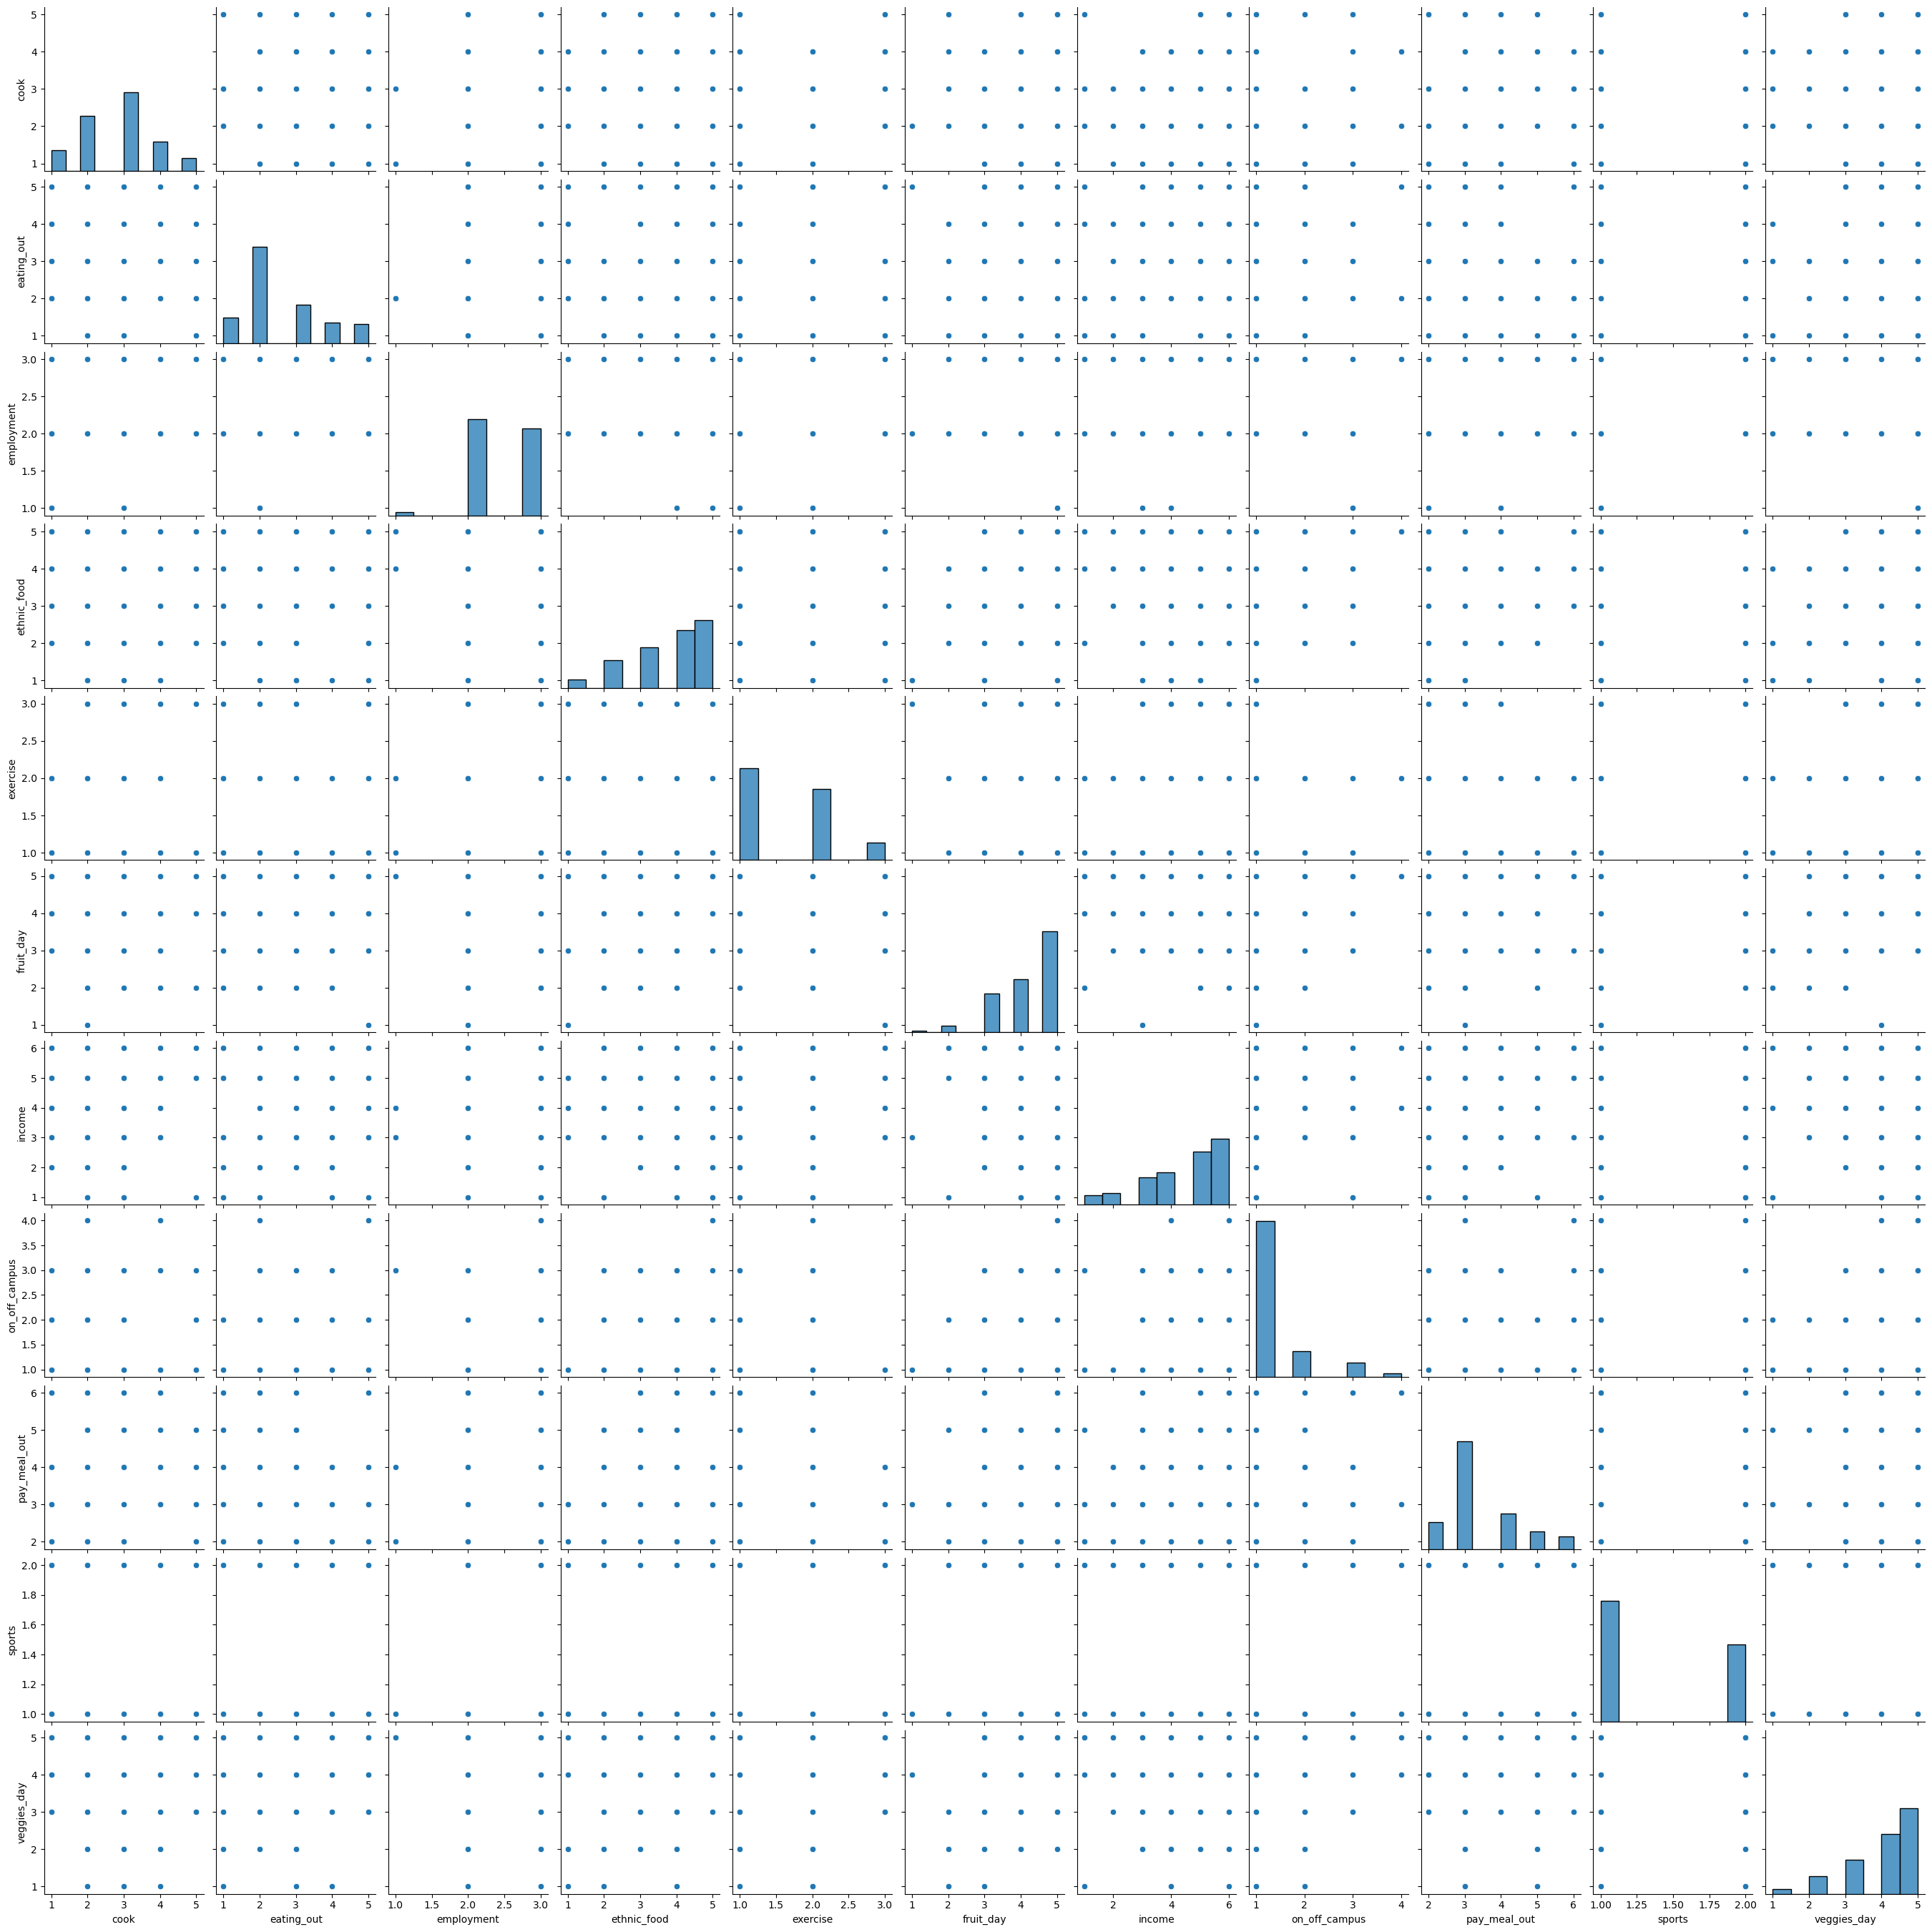

In [4]:
import seaborn as sns
sns.pairplot(df)

# Boxplot of dataset

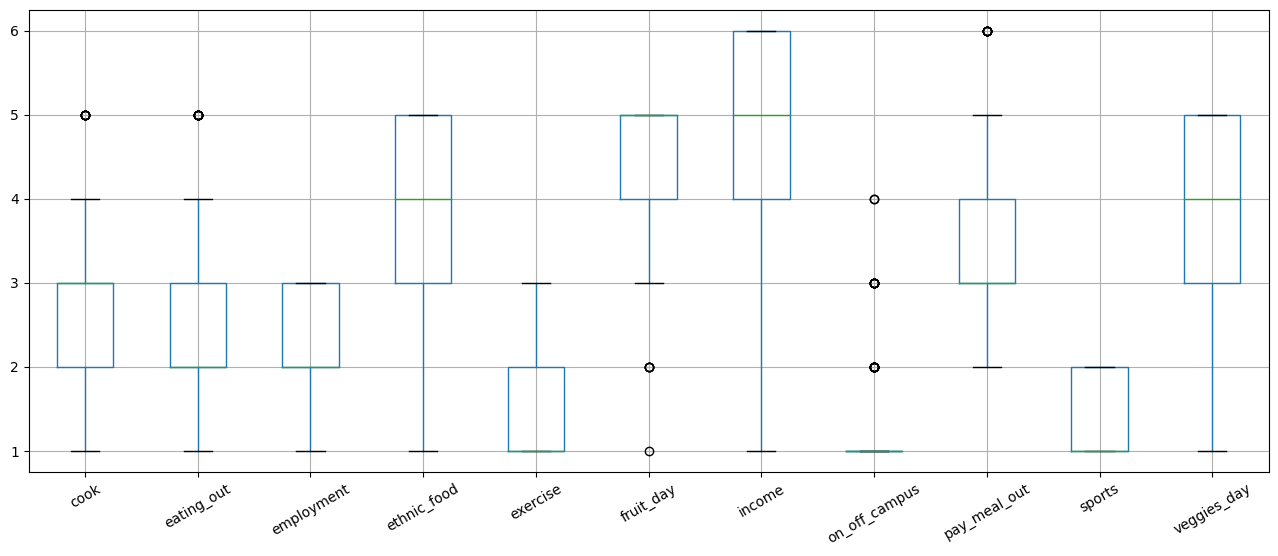

In [5]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  

ax=df.boxplot(figsize=(16,6))
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show() 

In [6]:
df.shape

(125, 11)

In [7]:
s = df.dropna()

# Run Kmeans Clustering on Data

In [8]:
## for data
import numpy as np
import pandas as pd
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for geospatial
import folium
import geopy
## for machine learning
from sklearn import preprocessing, cluster
import scipy
## for deep learning
import minisom

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


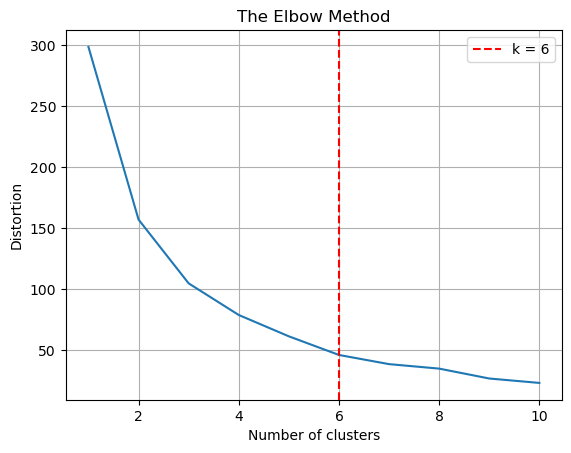

In [9]:

f=['cook','income']

X = s[f]
max_k = 10
## iterations
distortions = [] 
for i in range(1, max_k+1):
    if len(X) >= i:
       model = cluster.KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
       model.fit(X)
       distortions.append(model.inertia_)
## best k: the lowest derivative
k = [i*100 for i in np.diff(distortions,2)].index(min([i*100 for i 
     in np.diff(distortions,2)]))
## plot
fig, ax = plt.subplots()
ax.plot(range(1, len(distortions)+1), distortions)
ax.axvline(k, ls='--', color="red", label="k = "+str(k))
ax.set(title='The Elbow Method', xlabel='Number of clusters', 
       ylabel="Distortion")
ax.legend()
ax.grid(True)
plt.show()

# Get Geological Data

In [10]:
from pandas.io.json import json_normalize
import folium
from geopy.geocoders import Nominatim 
import requests

In [11]:


url = 'https://api.foursquare.com/v3/places/search?ll={}%2C{}&radius={}&limit=50'.format(
    13.133521,
    77.567135,
    30000
)


headers = {
    "accept": "application/json",
    "Authorization": "fsq3ot5BLDXd51yRglg3ExcW5eXI1VeDCJ1mx77w6AhOKtE="
}

results = requests.get(url, headers=headers).json() ;



In [12]:
results

{'results': [{'fsq_id': '5124b4cbe4b0047c5ad8902a',
   'categories': [{'id': 13040,
     'name': 'Dessert Shop',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/dessert_',
      'suffix': '.png'}}],
   'chains': [],
   'distance': 4745,
   'geocodes': {'main': {'latitude': 13.093356, 'longitude': 77.582586},
    'roof': {'latitude': 13.093356, 'longitude': 77.582586}},
   'link': '/v3/places/5124b4cbe4b0047c5ad8902a',
   'location': {'address': '293 Smk Complex',
    'country': 'IN',
    'cross_street': '1st Main Road,chikkanommasandra Circle',
    'formatted_address': '293 Smk Complex (1st Main Road,chikkanommasandra Circle), 560064, Karnātaka',
    'postcode': '560064',
    'region': 'Karnātaka'},
   'name': 'Kanti Sweets',
   'related_places': {},
   'timezone': 'Asia/Kolkata'},
  {'fsq_id': '54cf2060498e7db4b0f114ab',
   'categories': [{'id': 17119,
     'name': 'Bicycle Store',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/bikeshop_',
 

In [13]:
venues = results['results']
import pandas as pd
nearby_venues = pd.json_normalize(venues)

In [14]:
nearby_venues

,fsq_id,categories,chains,distance,link,name,timezone,geocodes.main.latitude,geocodes.main.longitude,geocodes.roof.latitude,...,location.formatted_address,location.postcode,location.region,location.locality,location.address_extended,geocodes.drop_off.latitude,geocodes.drop_off.longitude,related_places.children,related_places.parent.fsq_id,related_places.parent.name
0,5124b4cbe4b0047c5ad8902a,"[{'id': 13040, 'name': 'Dessert Shop', 'icon':...",[],4745,/v3/places/5124b4cbe4b0047c5ad8902a,Kanti Sweets,Asia/Kolkata,13.093356,77.582586,13.093356,...,"293 Smk Complex (1st Main Road,chikkanommasand...",560064,Karnātaka,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,54cf2060498e7db4b0f114ab,"[{'id': 17119, 'name': 'Bicycle Store', 'icon'...",[],8070,/v3/places/54cf2060498e7db4b0f114ab,Decathlon,Asia/Kolkata,13.168582,77.632363,NaN,...,"Bangalore, Karnātaka",NaN,Karnātaka,Bangalore,NaN,NaN,NaN,NaN,NaN,NaN
2,50dd764ae4b0d2d23682654c,"[{'id': 13027, 'name': 'Bistro', 'icon': {'pre...",[],8214,/v3/places/50dd764ae4b0d2d23682654c,Big Straw,Asia/Kolkata,13.063497,77.591274,13.063497,...,"Century Corbel Commercial, Sahakara Nagar Main...",560092,Karnātaka,Bangalore,"Opposite To Reliance Digital, G Block, Sahakar",NaN,NaN,NaN,NaN,NaN
3,4f734b06e4b0601c70d3a30f,"[{'id': 13236, 'name': 'Italian Restaurant', '...",[],10221,/v3/places/4f734b06e4b0601c70d3a30f,Mezzaluna,Asia/Kolkata,13.042207,77.554747,13.042207,...,"Movenpick Hotel .And Spa, 115, Gokula Extensio...",560013,Karnātaka,Bangalore,NaN,NaN,NaN,NaN,NaN,NaN
4,4d52ba92d7eaa1437dee810f,"[{'id': 13199, 'name': 'Indian Restaurant', 'i...",[],10503,/v3/places/4d52ba92d7eaa1437dee810f,Kanti Sweets,Asia/Kolkata,13.038974,77.564234,13.038974,...,"Chandrappa Complex (New BEL Road), Bangalore 5...",560054,Karnātaka,Bangalore,NaN,NaN,NaN,NaN,NaN,NaN
5,511109d1e4b06ce8e794f039,"[{'id': 13035, 'name': 'Coffee Shop', 'icon': ...",[],11494,/v3/places/511109d1e4b06ce8e794f039,Hill Station Cafe,Asia/Kolkata,13.065033,77.646501,NaN,...,"103 Narayanapura Main Road, Kothanur, Nagavara...",560045,Karnataka,Bangalore,NaN,NaN,NaN,NaN,NaN,NaN
6,4f0b2674e4b0ca3a5efdaeaf,"[{'id': 13031, 'name': 'Burger Joint', 'icon':...",[],11735,/v3/places/4f0b2674e4b0ca3a5efdaeaf,Ice N Spice by truffles,Asia/Kolkata,13.028196,77.573153,13.028196,...,"Near Ramaiah Medical College (80 Feet Road), B...",941735,Karnātaka,Bangalore,NaN,NaN,NaN,NaN,NaN,NaN
7,5b112e692f97ec002c46bcea,"[{'id': 13029, 'name': 'Brewery', 'icon': {'pr...",[],11554,/v3/places/5b112e692f97ec002c46bcea,Byg Brewski,Asia/Kolkata,13.070819,77.652451,NaN,...,"Blossoms Road, Kuvempu Layout (Visthar), Banga...",560077,Karnātaka,Bangalore,NaN,NaN,NaN,NaN,NaN,NaN
8,527a3854498e2e7f69624541,"[{'id': 17012, 'name': 'Motorcycle Dealership'...",[],11540,/v3/places/527a3854498e2e7f69624541,Moto Store and Café,Asia/Kolkata,13.032180,77.589912,13.032180,...,"No.9, Lake Sqaure (Tank Road(Kensington Road),...",560042,Karnātaka,Bangalore,1st Floor,NaN,NaN,NaN,NaN,NaN
9,4bfd10ba4cf820a16bd9ebf4,"[{'id': 13145, 'name': 'Fast Food Restaurant',...",[],11734,/v3/places/4bfd10ba4cf820a16bd9ebf4,Ice and Spice,Asia/Kolkata,13.028240,77.573105,13.028240,...,"New Bel Road (80 Feet Road), Bangalore 560094,...",560094,Karnātaka,Bangalore,NaN,13.028086,77.573073,NaN,NaN,NaN


In [15]:
nearby_venues.columns

Index(['fsq_id', 'categories', 'chains', 'distance', 'link', 'name',
       'timezone', 'geocodes.main.latitude', 'geocodes.main.longitude',
       'geocodes.roof.latitude', 'geocodes.roof.longitude', 'location.address',
       'location.country', 'location.cross_street',
       'location.formatted_address', 'location.postcode', 'location.region',
       'location.locality', 'location.address_extended',
       'geocodes.drop_off.latitude', 'geocodes.drop_off.longitude',
       'related_places.children', 'related_places.parent.fsq_id',
       'related_places.parent.name'],
      dtype='object')

#  Adding two more Columns Restaurant and Others
# Restaurant: Number of Restaurant in the radius of 20 km
# others:Number of Gyms, Parks,etc in the radius of 20 km

In [16]:
resta = []
oth = []
for lat,long in zip(nearby_venues['geocodes.main.latitude'],nearby_venues['geocodes.main.longitude']):
    url = 'https://api.foursquare.com/v3/places/search?ll={}%2C{}&radius={}&limit=50'.format(
        lat,
        long,
        30000
    )


    headers = {
        "accept": "application/json",
        "Authorization": "fsq3ot5BLDXd51yRglg3ExcW5eXI1VeDCJ1mx77w6AhOKtE="
    }

    results = requests.get(url, headers=headers).json() ;
    venues = results['results']
    nearby_venues = pd.json_normalize(venues)
    d = nearby_venues['categories']
    
    
    g = []
    for i in range(0,d.size) : 
        #print(d[i][0]['icon']['prefix'].find('food'))
        g.append(d[i][0]['icon']['prefix'].find('food'))
    co=0
    for i in g:
        if (i>0):
            co+=1
    resta.append(co)
    oth.append(len(g)-co)

nearby_venues['restaurant']=resta
nearby_venues['others']=oth
nearby_venues
        
    

,fsq_id,categories,chains,distance,link,name,timezone,geocodes.main.latitude,geocodes.main.longitude,geocodes.roof.latitude,...,location.postcode,location.region,location.address_extended,geocodes.drop_off.latitude,geocodes.drop_off.longitude,related_places.children,related_places.parent.fsq_id,related_places.parent.name,restaurant,others
0,4d99f557af3d236a05aa5ec7,"[{'id': 13046, 'name': 'Ice Cream Parlor', 'ic...",[],13,/v3/places/4d99f557af3d236a05aa5ec7,Naturals Icecream,Asia/Kolkata,12.996796,77.611292,12.996796,...,560005,Karnātaka,NaN,NaN,NaN,NaN,NaN,NaN,33,17
1,53e73083498ee825dbde6f12,"[{'id': 13016, 'name': 'Lounge', 'icon': {'pre...",[],1099,/v3/places/53e73083498ee825dbde6f12,Watson's,Asia/Kolkata,12.990705,77.619224,12.990705,...,560005,Karnātaka,4th Floor,NaN,NaN,NaN,NaN,NaN,31,19
2,505f2021e4b044452de609bb,"[{'id': 13216, 'name': 'Mughlai Restaurant', '...",[],749,/v3/places/505f2021e4b044452de609bb,Chichaba's Taj,Asia/Kolkata,13.000245,77.617334,13.000245,...,560005,Karnātaka,NaN,NaN,NaN,NaN,NaN,NaN,31,19
3,4fc25e01e4b089f18c5d6e0a,"[{'id': 11000, 'name': 'Business and Professio...",[],1335,/v3/places/4fc25e01e4b089f18c5d6e0a,ONEIRO by Anbujawahar - Photography,Asia/Kolkata,12.995687,77.623400,12.995687,...,560005,Karnātaka,NaN,12.995573,77.623323,NaN,NaN,NaN,34,16
4,4c80a4d6d8086dcb60ab6552,"[{'id': 13199, 'name': 'Indian Restaurant', 'i...",[],501,/v3/places/4c80a4d6d8086dcb60ab6552,Richies - Frazer Town,Asia/Kolkata,13.001066,77.613084,13.001066,...,560001,Karnātaka,NaN,NaN,NaN,NaN,NaN,NaN,33,17
5,4b9226f8f964a52099e933e3,"[{'id': 17033, 'name': 'Department Store', 'ic...",[],675,/v3/places/4b9226f8f964a52099e933e3,Thom's Bakery and Stores,Asia/Kolkata,12.968425,77.656952,12.968425,...,560005,Karnātaka,NaN,NaN,NaN,NaN,NaN,NaN,33,17
6,575d98ab498eefb67b5b93a6,"[{'id': 13059, 'name': 'Juice Bar', 'icon': {'...",[],524,/v3/places/575d98ab498eefb67b5b93a6,Lassi Shop Downtown,Asia/Kolkata,13.001021,77.613649,13.001021,...,000869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,18
7,4db12c9dfa8ca4b3e9f17b76,"[{'id': 13046, 'name': 'Ice Cream Parlor', 'ic...",[],1098,/v3/places/4db12c9dfa8ca4b3e9f17b76,Corner House,Asia/Kolkata,13.004914,77.617142,13.004914,...,560066,Karnātaka,NaN,NaN,NaN,NaN,NaN,NaN,32,18
8,4bfe21372b83b71323daa998,"[{'id': 13072, 'name': 'Asian Restaurant', 'ic...",[],1090,/v3/places/4bfe21372b83b71323daa998,Mangalore Pearl,Asia/Kolkata,12.990814,77.619189,12.990814,...,560042,Karnātaka,2nd Floor,NaN,NaN,NaN,NaN,NaN,29,21
9,4b6ee375f964a52029cf2ce3,"[{'id': 13199, 'name': 'Indian Restaurant', 'i...",[],1888,/v3/places/4b6ee375f964a52029cf2ce3,Ujwal Bar and Restaurant,Asia/Kolkata,12.992401,77.594561,12.992401,...,560052,Karnātaka,NaN,12.992312,77.594670,NaN,NaN,NaN,32,18


# Changing Col Name

In [17]:
lat=nearby_venues['geocodes.main.latitude']
long=nearby_venues['geocodes.main.longitude']

In [18]:
pip install minisom

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# Run K Means clustering on the dataset, with the optimal K value using Elbow Method
A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


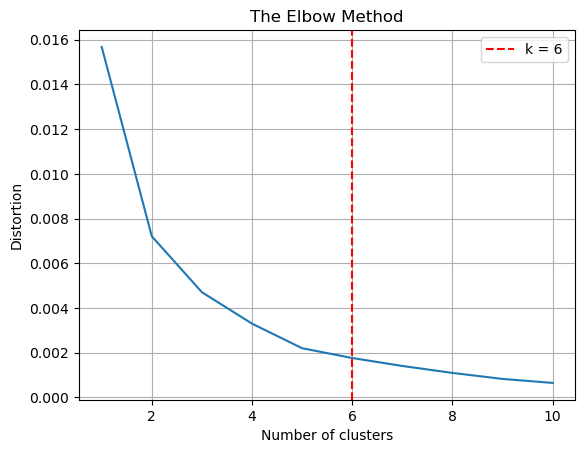

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


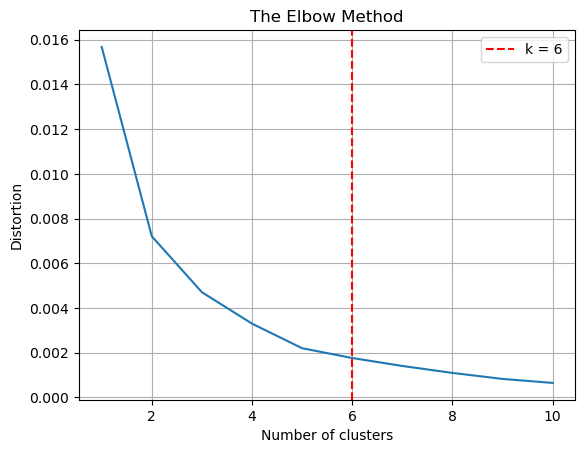

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


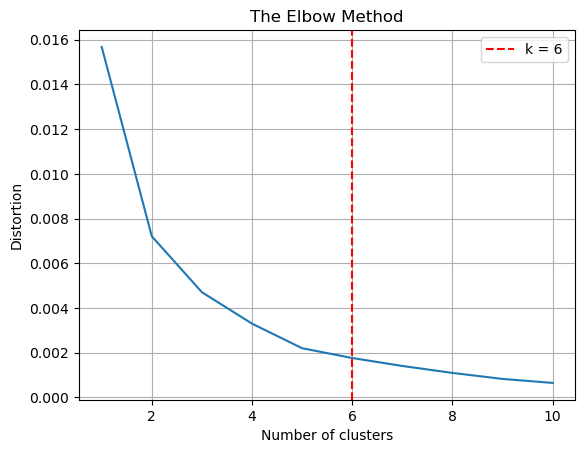

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


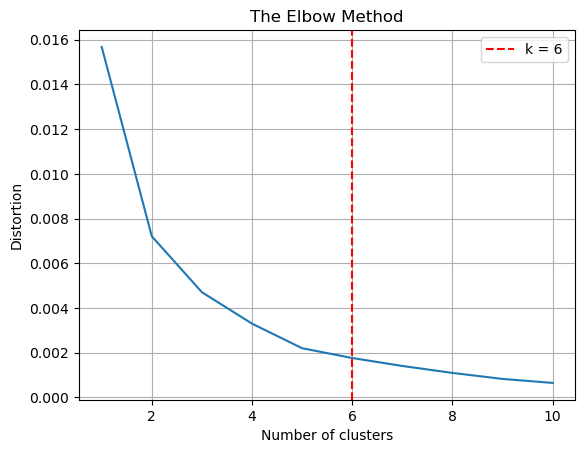

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


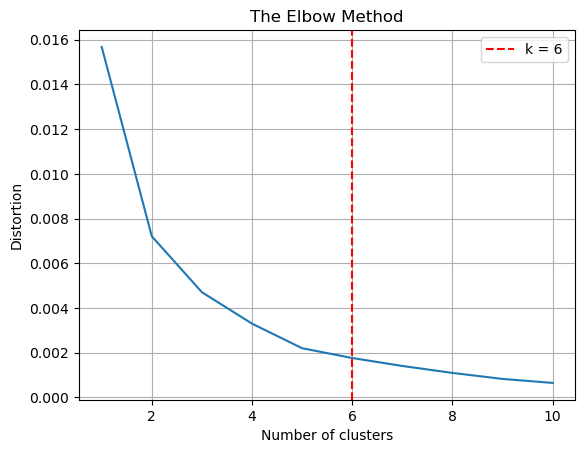

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


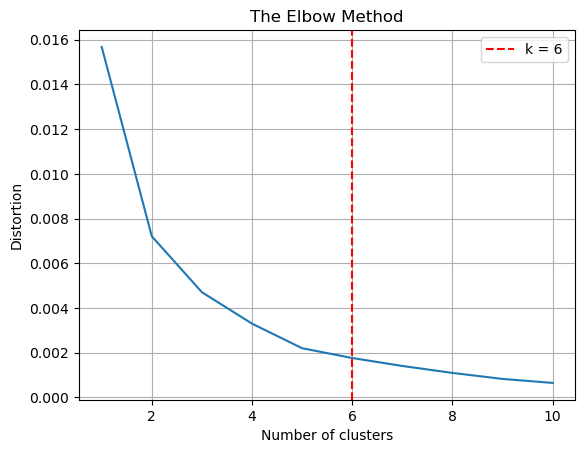

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


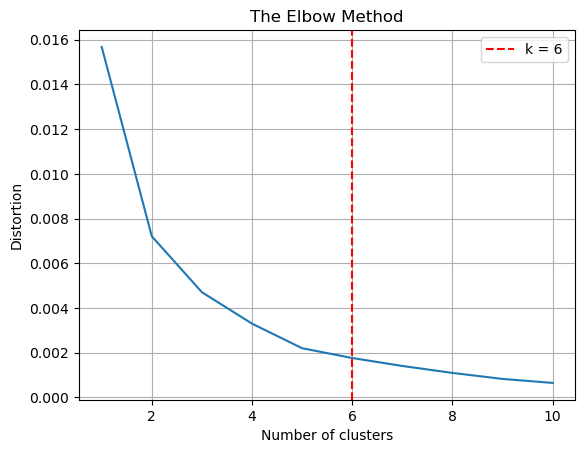

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


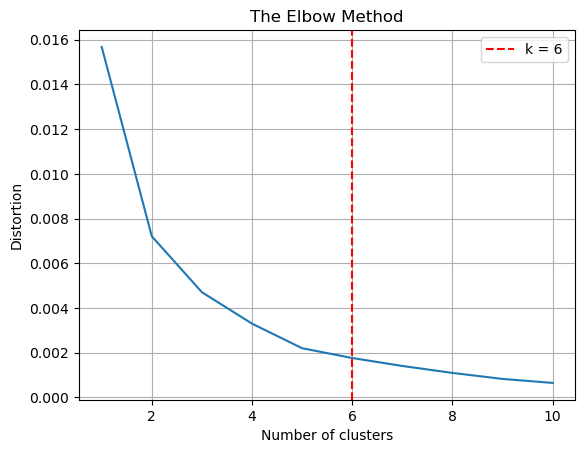

1.44 s ± 51.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [19]:
%%timeit 
f=['geocodes.main.latitude','geocodes.main.longitude']
X = nearby_venues[f]
max_k = 10
## iterations
distortions = [] 
for i in range(1, max_k+1):
    if len(X) >= i:
       model = cluster.KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
       model.fit(X)
       distortions.append(model.inertia_)
## best k: the lowest derivative
k = [i*100 for i in np.diff(distortions,2)].index(min([i*100 for i 
     in np.diff(distortions,2)]))
## plot
fig, ax = plt.subplots()
ax.plot(range(1, len(distortions)+1), distortions)
ax.axvline(k, ls='--', color="red", label="k = "+str(k))
ax.set(title='The Elbow Method', xlabel='Number of clusters', 
       ylabel="Distortion")
ax.legend()
ax.grid(True)
plt.show()

In [20]:
city = "Bengaluru"
## get location
locator = geopy.geocoders.Nominatim(user_agent="MyCoder")
location = locator.geocode(city)
print(location)
## keep latitude and longitude only
location = [location.latitude, location.longitude]
print("[lat, long]:", location)

Bengaluru, Bangalore North, Bangalore Urban, Karnataka, India
[lat, long]: [12.9767936, 77.590082]


In [21]:
nearby_venues.head()


,fsq_id,categories,chains,distance,link,name,timezone,geocodes.main.latitude,geocodes.main.longitude,geocodes.roof.latitude,...,location.postcode,location.region,location.address_extended,geocodes.drop_off.latitude,geocodes.drop_off.longitude,related_places.children,related_places.parent.fsq_id,related_places.parent.name,restaurant,others
0,4d99f557af3d236a05aa5ec7,"[{'id': 13046, 'name': 'Ice Cream Parlor', 'ic...",[],13,/v3/places/4d99f557af3d236a05aa5ec7,Naturals Icecream,Asia/Kolkata,12.996796,77.611292,12.996796,...,560005,Karnātaka,NaN,NaN,NaN,NaN,NaN,NaN,33,17
1,53e73083498ee825dbde6f12,"[{'id': 13016, 'name': 'Lounge', 'icon': {'pre...",[],1099,/v3/places/53e73083498ee825dbde6f12,Watson's,Asia/Kolkata,12.990705,77.619224,12.990705,...,560005,Karnātaka,4th Floor,NaN,NaN,NaN,NaN,NaN,31,19
2,505f2021e4b044452de609bb,"[{'id': 13216, 'name': 'Mughlai Restaurant', '...",[],749,/v3/places/505f2021e4b044452de609bb,Chichaba's Taj,Asia/Kolkata,13.000245,77.617334,13.000245,...,560005,Karnātaka,NaN,NaN,NaN,NaN,NaN,NaN,31,19
3,4fc25e01e4b089f18c5d6e0a,"[{'id': 11000, 'name': 'Business and Professio...",[],1335,/v3/places/4fc25e01e4b089f18c5d6e0a,ONEIRO by Anbujawahar - Photography,Asia/Kolkata,12.995687,77.623400,12.995687,...,560005,Karnātaka,NaN,12.995573,77.623323,NaN,NaN,NaN,34,16
4,4c80a4d6d8086dcb60ab6552,"[{'id': 13199, 'name': 'Indian Restaurant', 'i...",[],501,/v3/places/4c80a4d6d8086dcb60ab6552,Richies - Frazer Town,Asia/Kolkata,13.001066,77.613084,13.001066,...,560001,Karnātaka,NaN,NaN,NaN,NaN,NaN,NaN,33,17


# Data Cleaning Process for Extracting Necessary Columns in the Dataset

In [22]:
nearby_venues.columns


Index(['fsq_id', 'categories', 'chains', 'distance', 'link', 'name',
       'timezone', 'geocodes.main.latitude', 'geocodes.main.longitude',
       'geocodes.roof.latitude', 'geocodes.roof.longitude', 'location.address',
       'location.country', 'location.cross_street',
       'location.formatted_address', 'location.locality', 'location.postcode',
       'location.region', 'location.address_extended',
       'geocodes.drop_off.latitude', 'geocodes.drop_off.longitude',
       'related_places.children', 'related_places.parent.fsq_id',
       'related_places.parent.name', 'restaurant', 'others'],
      dtype='object')

In [23]:
columns = ['geocodes.main.latitude','geocodes.main.longitude','location.formatted_address','restaurant','others']
n = nearby_venues[columns]

In [24]:
n

,geocodes.main.latitude,geocodes.main.longitude,location.formatted_address,restaurant,others
0,12.996796,77.611292,"88/1B Sims Plaza (Coles Road, Frazer Town), Ba...",33,17
1,12.990705,77.619224,"Skywalk, 5/1, Assaye Road, Ulsoor (5/1, Assaye...",31,19
2,13.000245,77.617334,"50 M M Road Frazer Town, Bangalore 560005, Kar...",31,19
3,12.995687,77.623400,"13 Ramakrishnappa Road, Cox Town (Cox Town,), ...",34,16
4,13.001066,77.613084,"Frazer Town, Bangalore 560001, Karnātaka",33,17
5,12.968425,77.656952,"1/2, Wheelers Road (Near the East End Petrol P...",33,17
6,13.001021,77.613649,000869,32,18
7,13.004914,77.617142,"Davis Road (Opp. Holy Ghost Church), Bangalore...",32,18
8,12.990814,77.619189,"05-Jan, Skywalk Building, Assaye Road, Ulsoor ...",29,21
9,12.992401,77.594561,"402-a, Millers Road, Vasanthnagar, Bangalore 5...",32,18


# Dropping Nan Values from Dataset

In [25]:

n=n.dropna()
n = n.rename(columns={'geocodes.main.latitude': 'lat', 'geocodes.main.longitude': 'long'})
n

,lat,long,location.formatted_address,restaurant,others
0,12.996796,77.611292,"88/1B Sims Plaza (Coles Road, Frazer Town), Ba...",33,17
1,12.990705,77.619224,"Skywalk, 5/1, Assaye Road, Ulsoor (5/1, Assaye...",31,19
2,13.000245,77.617334,"50 M M Road Frazer Town, Bangalore 560005, Kar...",31,19
3,12.995687,77.623400,"13 Ramakrishnappa Road, Cox Town (Cox Town,), ...",34,16
4,13.001066,77.613084,"Frazer Town, Bangalore 560001, Karnātaka",33,17
5,12.968425,77.656952,"1/2, Wheelers Road (Near the East End Petrol P...",33,17
6,13.001021,77.613649,000869,32,18
7,13.004914,77.617142,"Davis Road (Opp. Holy Ghost Church), Bangalore...",32,18
8,12.990814,77.619189,"05-Jan, Skywalk Building, Assaye Road, Ulsoor ...",29,21
9,12.992401,77.594561,"402-a, Millers Road, Vasanthnagar, Bangalore 5...",32,18


In [26]:
n['location.formatted_address']

0     88/1B Sims Plaza (Coles Road, Frazer Town), Ba...
1     Skywalk, 5/1, Assaye Road, Ulsoor (5/1, Assaye...
2     50 M M Road Frazer Town, Bangalore 560005, Kar...
3     13 Ramakrishnappa Road, Cox Town (Cox Town,), ...
4              Frazer Town, Bangalore 560001, Karnātaka
5     1/2, Wheelers Road (Near the East End Petrol P...
6                                                000869
7     Davis Road (Opp. Holy Ghost Church), Bangalore...
8     05-Jan, Skywalk Building, Assaye Road, Ulsoor ...
9     402-a, Millers Road, Vasanthnagar, Bangalore 5...
10                      Hall Road, Bangalore, Karnātaka
11    2 Ground Floor, Shah Sultan Complex, Cunningha...
12    Gem Plaza, Ground Floor, 66, Infantry Road (In...
13    40 St. Marks Road (St. Marks Rd), Bangalore 56...
14    9 St Johns Road, Ulsoor, Bangalore 560042, Kar...
15    1 M G Road Cubbon Road, Bangalore 560001, Karn...
16    46 Millers Road, Vasanthnagar, Bangalore 56005...
17    Ulsoor Lake (anna swamy mudaliar street), 

In [27]:
n['location.formatted_address'] = "[" + n['location.formatted_address'].astype(str)+"]"


In [28]:
n

,lat,long,location.formatted_address,restaurant,others
0,12.996796,77.611292,"[88/1B Sims Plaza (Coles Road, Frazer Town), B...",33,17
1,12.990705,77.619224,"[Skywalk, 5/1, Assaye Road, Ulsoor (5/1, Assay...",31,19
2,13.000245,77.617334,"[50 M M Road Frazer Town, Bangalore 560005, Ka...",31,19
3,12.995687,77.623400,"[13 Ramakrishnappa Road, Cox Town (Cox Town,),...",34,16
4,13.001066,77.613084,"[Frazer Town, Bangalore 560001, Karnātaka]",33,17
5,12.968425,77.656952,"[1/2, Wheelers Road (Near the East End Petrol ...",33,17
6,13.001021,77.613649,[000869],32,18
7,13.004914,77.617142,"[Davis Road (Opp. Holy Ghost Church), Bangalor...",32,18
8,12.990814,77.619189,"[05-Jan, Skywalk Building, Assaye Road, Ulsoor...",29,21
9,12.992401,77.594561,"[402-a, Millers Road, Vasanthnagar, Bangalore ...",32,18


In [29]:
spec_chars = ["[","]"]
for char in spec_chars:
    n['location.formatted_address'] = n['location.formatted_address'].astype(str).str.replace(char, ' ')

C:\Users\sweta\AppData\Local\Temp\ipykernel_12860\1702897907.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  n['location.formatted_address'] = n['location.formatted_address'].astype(str).str.replace(char, ' ')


In [30]:
n

,lat,long,location.formatted_address,restaurant,others
0,12.996796,77.611292,"88/1B Sims Plaza (Coles Road, Frazer Town), B...",33,17
1,12.990705,77.619224,"Skywalk, 5/1, Assaye Road, Ulsoor (5/1, Assay...",31,19
2,13.000245,77.617334,"50 M M Road Frazer Town, Bangalore 560005, Ka...",31,19
3,12.995687,77.623400,"13 Ramakrishnappa Road, Cox Town (Cox Town,),...",34,16
4,13.001066,77.613084,"Frazer Town, Bangalore 560001, Karnātaka",33,17
5,12.968425,77.656952,"1/2, Wheelers Road (Near the East End Petrol ...",33,17
6,13.001021,77.613649,000869,32,18
7,13.004914,77.617142,"Davis Road (Opp. Holy Ghost Church), Bangalor...",32,18
8,12.990814,77.619189,"05-Jan, Skywalk Building, Assaye Road, Ulsoor...",29,21
9,12.992401,77.594561,"402-a, Millers Road, Vasanthnagar, Bangalore ...",32,18


# Plot the clustered locations on a map

In [31]:
x, y = "lat", "long"
color = "restaurant"
size = "others"
popup = "location.formatted_address"
data = n.copy()

## create color column
lst_colors=["red","green","orange"]
lst_elements = sorted(list(n[color].unique()))

## create size column (scaled)
scaler = preprocessing.MinMaxScaler(feature_range=(3,15))
data["size"] = scaler.fit_transform(
               data[size].values.reshape(-1,1)).reshape(-1)

## initialize the map with the starting location
map_ = folium.Map(location=location, tiles="cartodbpositron",
                  zoom_start=11)
## add points
data.apply(lambda row: folium.CircleMarker(
           location=[row[x],row[y]],popup=row[popup],
           radius=row["size"]).add_to(map_), axis=1)
## add html legend


## plot the map
map_
     

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


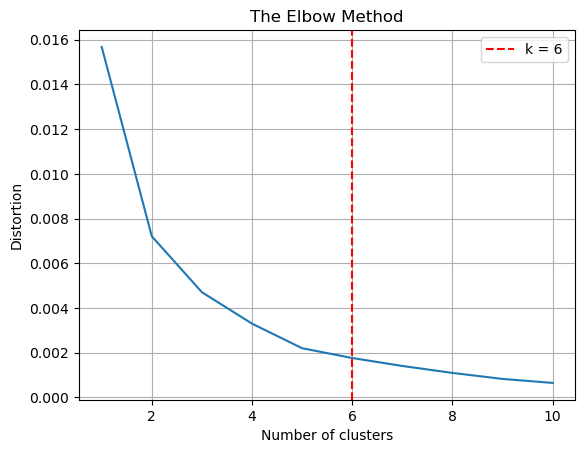

In [32]:

X = n[["lat","long"]]
max_k = 10
## iterations
distortions = [] 
for i in range(1, max_k+1):
    if len(X) >= i:
       model = cluster.KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
       model.fit(X)
       distortions.append(model.inertia_)
## best k: the lowest derivative
k = [i*100 for i in np.diff(distortions,2)].index(min([i*100 for i in np.diff(distortions,2)]))
## plot
fig, ax = plt.subplots()
ax.plot(range(1, len(distortions)+1), distortions)
ax.axvline(k, ls='--', color="red", label="k = "+str(k))
ax.set(title='The Elbow Method', xlabel='Number of clusters', 
       ylabel="Distortion")
ax.legend()
ax.grid(True)
plt.show()

In [33]:

k = 7
model = cluster.KMeans(n_clusters=k, init='k-means++')
X = n[["lat","long"]]
## clustering
dtf_X = X.copy()
dtf_X["cluster"] = model.fit_predict(X)
## find real centroids
closest, distances = scipy.cluster.vq.vq(model.cluster_centers_, 
                     dtf_X.drop("cluster", axis=1).values)
dtf_X["centroids"] = 0
for i in closest:
    dtf_X["centroids"].iloc[i] = 1
## add clustering info to the original dataset
n[["cluster","centroids"]] = dtf_X[["cluster","centroids"]]
n

C:\Users\sweta\AppData\Local\Temp\ipykernel_12860\4175931408.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtf_X["centroids"].iloc[i] = 1


,lat,long,location.formatted_address,restaurant,others,cluster,centroids
0,12.996796,77.611292,"88/1B Sims Plaza (Coles Road, Frazer Town), B...",33,17,5,0
1,12.990705,77.619224,"Skywalk, 5/1, Assaye Road, Ulsoor (5/1, Assay...",31,19,1,0
2,13.000245,77.617334,"50 M M Road Frazer Town, Bangalore 560005, Ka...",31,19,5,1
3,12.995687,77.623400,"13 Ramakrishnappa Road, Cox Town (Cox Town,),...",34,16,5,0
4,13.001066,77.613084,"Frazer Town, Bangalore 560001, Karnātaka",33,17,5,0
5,12.968425,77.656952,"1/2, Wheelers Road (Near the East End Petrol ...",33,17,3,0
6,13.001021,77.613649,000869,32,18,5,0
7,13.004914,77.617142,"Davis Road (Opp. Holy Ghost Church), Bangalor...",32,18,5,0
8,12.990814,77.619189,"05-Jan, Skywalk Building, Assaye Road, Ulsoor...",29,21,1,0
9,12.992401,77.594561,"402-a, Millers Road, Vasanthnagar, Bangalore ...",32,18,6,0


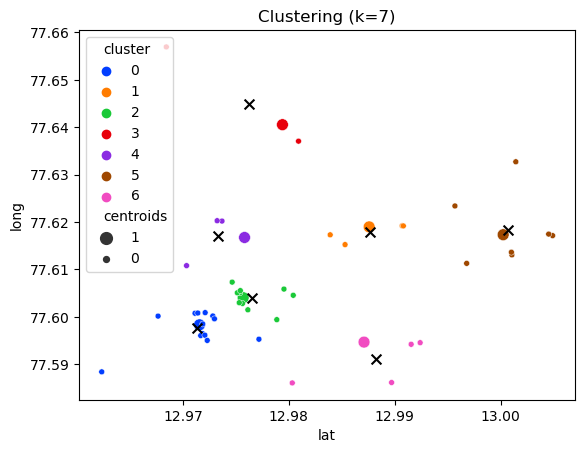

In [34]:
## plot
fig, ax = plt.subplots()
sns.scatterplot(x="lat", y="long", data=n, 
                palette=sns.color_palette("bright",k),
                hue='cluster', size="centroids", size_order=[1,0],
                legend="brief", ax=ax).set_title('Clustering (k='+str(k)+')')
th_centroids = model.cluster_centers_
ax.scatter(th_centroids[:,0], th_centroids[:,1], s=50, c='black', 
           marker="x")
plt.show()

In [35]:

model = cluster.AffinityPropagation()

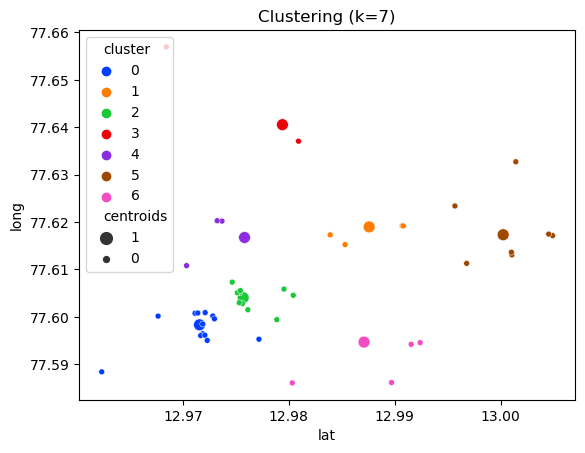

In [36]:

k = n["cluster"].nunique()
sns.scatterplot(x="lat", y="long", data=n, 
                palette=sns.color_palette("bright",k),
                hue='cluster', size="centroids", size_order=[1,0],
                legend="brief").set_title('Clustering (k='+str(k)+')')
plt.show()


In [37]:
x, y = "lat", "long"
color = "cluster"
size = "restaurant"
popup = "location.formatted_address"
marker = "centroids"
data = n.copy()
## create color column
lst_elements = sorted(list(n[color].unique()))
lst_colors = ['#%06X' % np.random.randint(0, 0xFFFFFF) for i in 
              range(len(lst_elements))]
data["color"] = data[color].apply(lambda x: 
                lst_colors[lst_elements.index(x)])
## create size column (scaled)
scaler = preprocessing.MinMaxScaler(feature_range=(3,15))
data["size"] = scaler.fit_transform(
               data[size].values.reshape(-1,1)).reshape(-1)
## initialize the map with the starting location
map_ = folium.Map(location=location, tiles="cartodbpositron",
                  zoom_start=11)
## add points
data.apply(lambda row: folium.CircleMarker(
           location=[row[x],row[y]], 
           color=row["color"], fill=True,popup=row[popup],
           radius=row["size"]).add_to(map_), axis=1)
## add html legend
legend_html = """ """+color+""":"""
for i in lst_elements:
     legend_html = legend_html+""" 
      """+str(i)+""""""
legend_html = legend_html+""""""
map_.get_root().html.add_child(folium.Element(legend_html))
## add centroids marker
lst_elements = sorted(list(n[marker].unique()))
data[data[marker]==1].apply(lambda row: 
           folium.Marker(location=[row[x],row[y]], 
           draggable=False,  popup=row[popup] ,       
           icon=folium.Icon(color="black")).add_to(map_), axis=1)
## plot the map
map_